
# CUNEF MUCD 2022/2023
# Machine Learning

## Analisis of Yelp Dataset

by Gozde Yazganoglu

##### Imporrting necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import json

from os import path

import pickle

import warnings
warnings.filterwarnings('ignore')


from aux_func import process_columns, preview_data, check_missing_feautre

#### Loading of the datasets 

Due to the size of datasets we have got problems to directly process the data. The data has been preprocessed in the other notebook to the pickle format. In this way we are able to open them in the same notebook. We use streaming approach to open the dataframes.

In [2]:
# Path we have saved previous processed pickle formated data.
from pathlib import Path

path_processed = '../data/processed/'

In [3]:
with open(Path(path_processed, 'business.pkl'), 'rb') as f:
    # Load the data from the file
    df_business = pickle.load(f)

with open(Path(path_processed, 'review.pkl'), 'rb') as f:
    # Load the data from the file
    df_review = pickle.load(f)    

with open(Path(path_processed, 'checkin.pkl'), 'rb') as f:
    # Load the data from the file
    df_checkin = pickle.load(f)
    
with open(Path(path_processed, 'tip.pkl'), 'rb') as f:
    # Load the data from the file
    df_tip = pickle.load(f)
    
with open(Path(path_processed, 'user.pkl'), 'rb') as f:
    # Load the data from the file
    df_user = pickle.load(f)


### 1.Analisis of Business dataset

We read dataframe of business.

In [4]:
preview_data(df_business)

Dataset has  150346 rows and  14 columns


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [5]:
check_missing_feautre(df_business)

Missing values and datatypes of dataframe


,index,missing_value,feature_type
0,business_id,0,object
1,name,0,object
2,address,0,object
3,city,0,object
4,state,0,object
5,postal_code,0,object
6,latitude,0,float64
7,longitude,0,float64
8,stars,0,float64
9,review_count,0,int64


We continue exploring the data types. Since this dataset has few columns, we can say a few words before analyzing more deeply. Considering our business case, variable business id is not useful, we are trying to understand objective criteria that affects to the business. 

Here we have a variable 'is_open'. In our analisis we don't use this as the target variable as we are interested more in the distribution of star raiting. Yet we are interested in see if star rating is afected by this.


'city', 'address', 'name', 'postal code' , 'state' are distinctive variables but since they are in string we are not able to use it in any kind of machine learning algorithm. However 'longitude', 'lattitude' are numeric variables that we can use for graphing or trying to locate the business.

'attributes' variable is saved in json format. Because not all the attributes are available for all businesses and perhaps business users or revievers are giving this information according to their indivudual attention to details. If we can clean this column and change it tu numeric, we can perhaps know better which attributes are affecting the business better than the other attributes.

Business 'categories' are important, some businesses create difference by being the only available in their category in the neighbourhood, even though sometimes they are bad.

Available 'hours' are important, some businesses can chalenge others if they are availalbe more time.

Finally, of course 'stars' and 'review_count' are here important numeric variables. Most of the time customers choosing a business according to their review in internet. How good it is and how many people are agreeing on this idea. Below we can check descriptive statistics. We try to understand 'stars distribution.


In [6]:
df_business.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


As we observe from lattitude and longitude we can conclude that all businesses are located are North America. Negative values for longitude are located in west hemisphere and positive values for latitude are located in North Hemisphere. This means we cannot choose in Europe, we need to choose a location in USA.

##### Open vs. closed busineses and their ratings 

Text(0.5, 0, 'Rating')

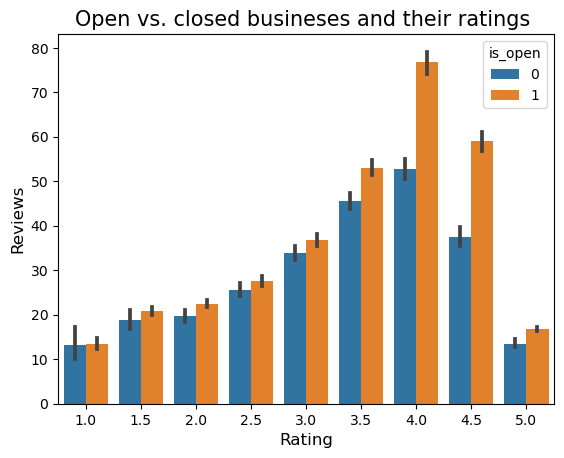

In [7]:
sns.barplot(data=df_business, x="stars", y="review_count", hue="is_open")
plt.title("Open vs. closed busineses and their ratings ",fontsize = 15)
plt.ylabel('Reviews', fontsize = 12)
plt.xlabel('Rating', fontsize = 12)


From this graph we infere that open and closed businesses are recieving star rating similary distributed. Open businesses receive more higher stars but yet a important of closed businesses received high stars. Therefore, raiting is not necessarily bringing success.

In [8]:
df_target_pc = df_business['is_open']\
        .value_counts(normalize = True)\
        .mul(100).rename('percent').reset_index()

df_target_count = df_business['is_open'].value_counts().reset_index()
df_target = pd.merge(df_target_pc, df_target_count, 
on = ['index'], how = 'inner')
df_target

,index,percent,is_open
0,1,79.615021,119698
1,0,20.384979,30648


80% of the businesses are open. 20 percent of the businesses are closed. Distribution of the ratings are more or less similar for open and closed businesses. We cannot see a direct relation. For this reason, it is a better approach trying to understand also other characteristics of the business. This caracteristics are not yet known to us. We should try to understand this during analyzing algorithms.

In [9]:
preview_data(df_business)

Dataset has  150346 rows and  14 columns


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


Restaurants are the category that recieve most reviews in general.First we tried dividing according to first word in the column. However, we see that, there are more main categories like Seafood, Burgers, Chinese that can be also classified as restaurant. We can check all categories that contains restaurant. This is a better approach.

In [10]:
df_business['is_rest'] = df_business['categories'].str.contains('Restaurant', na=False)
#puting boolean condition
cond = df_business['is_rest'] == True

# Using the boolean condition to filter the DataFrame and remove all other data that is not restaurant.
df_business = df_business.loc[cond]


In [11]:
preview_data(df_business)

Dataset has  52286 rows and  15 columns


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,is_rest
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",True
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",True
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None,True
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",True
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",True


Now we check distributions in differnt cities.

In [12]:
bus_city = df_business.city.value_counts().sort_values(ascending = False).iloc[0:15]
bus_city = pd.DataFrame(bus_city).reset_index()
bus_city

,index,city
0,Philadelphia,5854
1,Tampa,2961
2,Indianapolis,2862
3,Nashville,2503
4,Tucson,2470
5,New Orleans,2260
6,Edmonton,2166
7,Saint Louis,1791
8,Reno,1288
9,Boise,849


Text(0.5, 0, 'Cities')

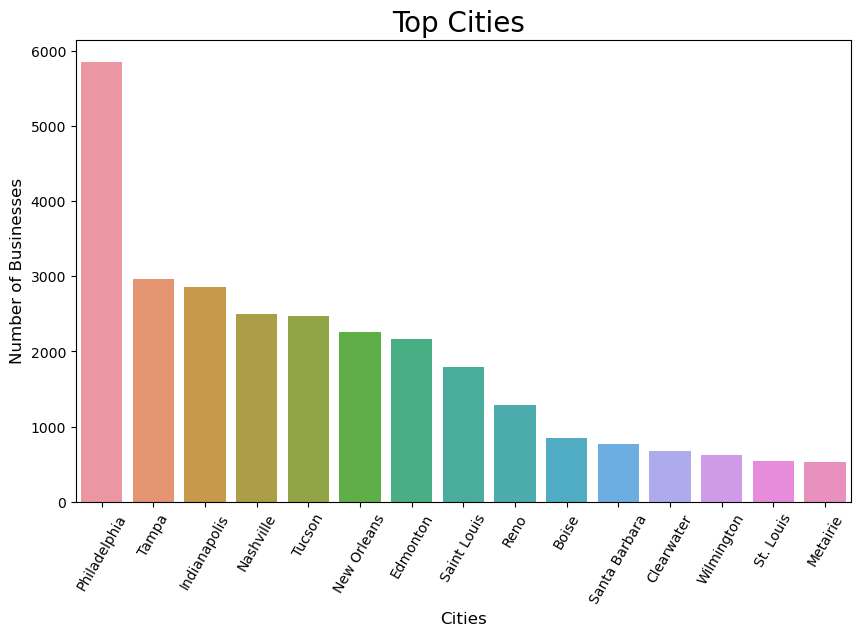

In [13]:
# Bar ploting by cities
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(bus_city, x= 'index', y= 'city')
plt.title("Top Cities ",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 60)
plt.ylabel('Number of Businesses', fontsize = 12)
plt.xlabel('Cities', fontsize = 12)

Philedelphia is the city with most reviews for restaurants which makes it more challanging for business owners. We can analyze restaurants in Philedelphia.  

In [14]:
cond_city = df_business['city'] == 'Philadelphia'

# Use the boolean condition to filter the DataFrame
df_business = df_business.loc[cond_city]
preview_data(df_business)

Dataset has  5854 rows and  15 columns


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,is_rest
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",True
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",True
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",True
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",True
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",True


In [15]:
preview_data(df_business)

Dataset has  5854 rows and  15 columns


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,is_rest
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",True
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",True
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",True
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",True
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",True


Now we check only restaurants in Philedelphia and their rating distribution.

Text(0.5, 0, 'Rating')

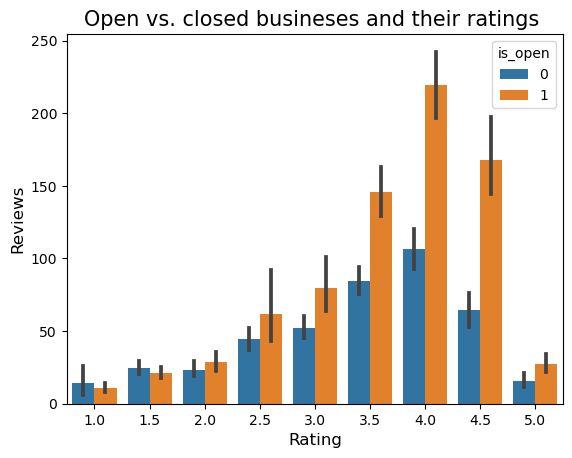

In [16]:
#bar plot to see distributon of the rates and restaurants.
sns.barplot(data=df_business, x="stars", y="review_count", hue="is_open")
plt.title("Open vs. closed busineses and their ratings ",fontsize = 15)
plt.ylabel('Reviews', fontsize = 12)
plt.xlabel('Rating', fontsize = 12)

When it comes to restaurants in Philedelphia, star rating in restaurants open and closed businesses differ but still an important amount of the restaurants are highly rated but they are closed. We can conclude that high rated restaurants aren't necessarily succesful. 

In order to analyze better we would like to see attributes variable more clean. Some attributes can be game changer to be successful. However this column is in json format and probabaly will come with a lot of null values.

In [17]:
warnings.filterwarnings('ignore' )
#this code behaves df_business['attributes'] as series and 
#dissolve it like it is a json file and later remove attributes column
#we create a new data frame with new columns
df_business_exp = pd.concat([df_business.drop(['attributes'], axis=1),
                                     df_business['attributes'].apply(pd.Series)
                                    ], axis=1)

In [18]:
preview_data(df_business_exp)

Dataset has  5854 rows and  52 columns


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,BestNights,Corkage,BYOBCorkage,BYOB,DriveThru,Open24Hours,AcceptsInsurance,AgesAllowed,DietaryRestrictions,RestaurantsCounterService
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
check_missing_feautre(df_business_exp)

Missing values and datatypes of dataframe


,index,missing_value,feature_type
0,business_id,0,object
1,is_rest,0,bool
2,categories,0,object
3,is_open,0,int64
4,stars,0,float64
5,longitude,0,float64
6,review_count,0,int64
7,postal_code,0,object
8,state,0,object
9,city,0,object


Attributes are not available for all restaurants. We can subsitute null values with 0. 

In [20]:
df_business_exp.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'hours', 'is_rest', 'RestaurantsDelivery',
       'OutdoorSeating', 'BusinessAcceptsCreditCards', 'BusinessParking',
       'BikeParking', 'RestaurantsPriceRange2', 'RestaurantsTakeOut',
       'ByAppointmentOnly', 'WiFi', 'Alcohol', 'Caters',
       'RestaurantsReservations', 'RestaurantsGoodForGroups',
       'RestaurantsAttire', 'HasTV', 'Ambience', 'GoodForKids', 'GoodForMeal',
       'NoiseLevel', 'DogsAllowed', 'HappyHour', 'WheelchairAccessible',
       'RestaurantsTableService', 'Smoking', 'Music', 'GoodForDancing',
       'BusinessAcceptsBitcoin', 'CoatCheck', 'BestNights', 'Corkage',
       'BYOBCorkage', 'BYOB', 'DriveThru', 'Open24Hours', 'AcceptsInsurance',
       'AgesAllowed', 'DietaryRestrictions', 'RestaurantsCounterService'],
      dtype='object')

In [21]:
#from above results, we copy attribute type of variables to be procesed
"""Function from auxiliar file to clean attributes data."""
columns_to_change = ['RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards',
       'BusinessParking', 'BikeParking', 'RestaurantsPriceRange2',
       'RestaurantsTakeOut', 'ByAppointmentOnly', 'WiFi', 'Alcohol', 'Caters',
       'RestaurantsReservations', 'RestaurantsGoodForGroups',
       'RestaurantsAttire', 'HasTV', 'Ambience', 'GoodForKids', 'GoodForMeal',
       'NoiseLevel', 'DogsAllowed', 'HappyHour', 'WheelchairAccessible',
       'RestaurantsTableService', 'Smoking', 'Music', 'GoodForDancing',
       'BusinessAcceptsBitcoin', 'CoatCheck', 'BestNights', 'Corkage',
       'BYOBCorkage', 'BYOB', 'DriveThru', 'Open24Hours', 'AcceptsInsurance',
       'AgesAllowed', 'DietaryRestrictions', 'RestaurantsCounterService']

process_columns(df_business_exp, columns_to_change)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,BestNights,Corkage,BYOBCorkage,BYOB,DriveThru,Open24Hours,AcceptsInsurance,AgesAllowed,DietaryRestrictions,RestaurantsCounterService
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,False,False,False,False,False,False,False,False,False
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,False,False,False,False,False,False,False,False,False,False
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,...,False,False,False,False,False,False,False,False,False,False
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,...,False,False,False,False,False,False,False,False,False,False
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150287,VZbkSeZtFynEascotq7ExA,Ali Baba Magic Food,37TH And Walnut,Philadelphia,PA,19104,39.953391,-75.196765,4.0,8,...,False,False,False,False,False,False,False,False,False,False
150298,gPr1io7ks0Eo3FDsnDTYfg,Tata Cafe,7201 Germantown Ave,Philadelphia,PA,19119,40.060414,-75.191084,4.0,21,...,False,False,False,False,False,False,False,False,False,False
150306,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128,40.032483,-75.214430,3.0,55,...,False,False,False,False,False,False,False,False,False,False
150319,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104,39.951018,-75.198240,3.0,22,...,False,False,False,False,False,False,False,False,False,False


'categories' variable has some information about restaurant types.They are not available to us. As a consumer, food type is very important for me in restaurant selection. Just as we have filtered restaurants from all businesses, we can choose categories and create food types.

In [22]:
types =['Turkish','Italian','Mexican','Seafood','Asian', 'Chinese', 'Japaneses', 'Indian','American','Fast Food',
        'Spanish','Sushi', 'Wok', 'Pizza', 'Tapas', 'Steakhouse', 'vegetarian', 'vegan','Kosher', 'Halal', 'Salad',
        'Tex-Mex','Cafe', 'Bar', 'Pub','Desert', 'Bistro','Thai', 'Latin','Korean', 'Nightlife','Soup','Cocktail'
        ,'Tea', 'Bakeries']

In [23]:
for t in types:
    df_business_exp[t] = df_business['categories'].str.contains(t, na = False)
    
preview_data(df_business_exp)

Dataset has  5854 rows and  87 columns


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Desert,Bistro,Thai,Latin,Korean,Nightlife,Soup,Cocktail,Tea,Bakeries
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,False,False,False,False,False,False,False,True,True
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,False,False,False,False,False,False,False,False,False,False
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,...,False,False,False,False,True,False,False,False,False,False
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,...,False,False,False,False,False,True,False,True,False,False
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,...,False,False,False,False,False,False,True,False,False,False


In [24]:
check_missing_feautre(df_business_exp)

Missing values and datatypes of dataframe


,index,missing_value,feature_type
0,business_id,0,object
1,Spanish,0,bool
2,Fast Food,0,bool
3,American,0,bool
4,Indian,0,bool
...,...,...,...
82,Caters,0,bool
83,Alcohol,0,bool
84,ByAppointmentOnly,0,bool
85,Bakeries,0,bool


In [25]:
warnings.filterwarnings('ignore' )
restaurants_hours = pd.concat([df_business_exp.drop(['hours'], axis=1),
                                     df_business_exp['hours'].apply(pd.Series)
                                    ], axis=1)

In [26]:
weekdays=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
restaurants_hours.loc[restaurants_hours.is_open == 1, weekdays].head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
3,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
15,NaN,13:30-22:0,13:30-22:0,13:30-22:0,13:30-23:0,13:30-23:0,13:30-22:0
19,11:30-20:30,11:30-20:30,11:30-20:30,11:30-20:30,11:30-20:30,11:30-20:30,NaN
35,0:0-0:0,NaN,16:0-22:0,16:0-22:0,16:0-19:0,11:0-23:0,11:0-20:0
82,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0


Text(0.5, 1.0, 'Open restaurants per day')

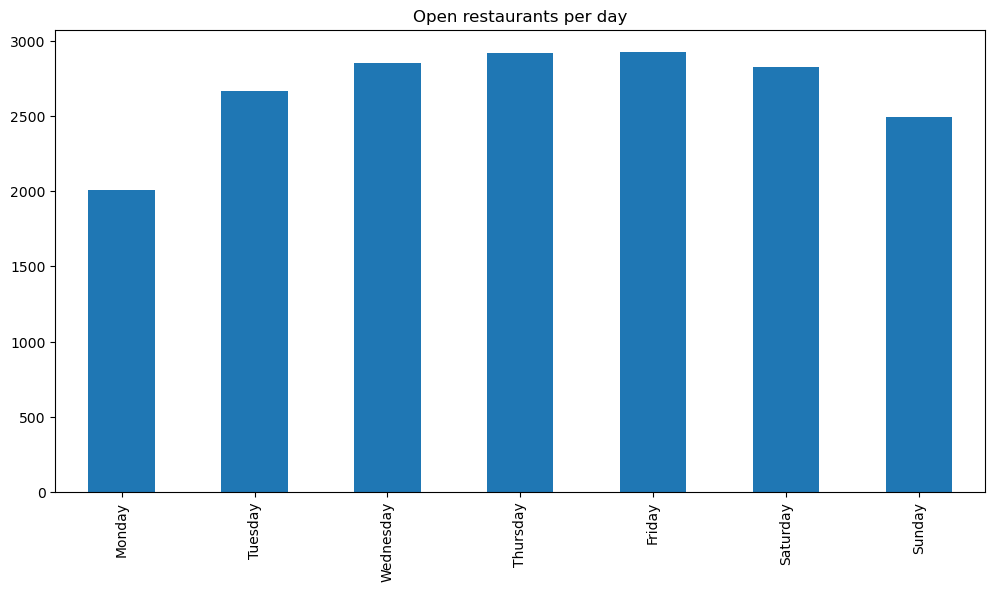

In [27]:
plt.figure(figsize=(12,6))
restaurants_hours[weekdays] = restaurants_hours[weekdays].replace({'0:0-0:0':np.nan})
opendays = restaurants_hours.loc[restaurants_hours.is_open == 1, weekdays].notnull()
opendays.T.sum(axis=1).plot(kind="bar")
plt.title('Open restaurants per day')

In [28]:
process_columns(restaurants_hours, weekdays)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Cocktail,Tea,Bakeries,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,True,True,True,True,True,True,True,True,True
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,False,False,False,False,True,True,True,True,True,True
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,...,False,False,False,True,True,True,True,True,True,False
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,...,True,False,False,True,True,True,True,True,True,True
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,...,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150287,VZbkSeZtFynEascotq7ExA,Ali Baba Magic Food,37TH And Walnut,Philadelphia,PA,19104,39.953391,-75.196765,4.0,8,...,False,False,False,False,False,False,False,False,False,False
150298,gPr1io7ks0Eo3FDsnDTYfg,Tata Cafe,7201 Germantown Ave,Philadelphia,PA,19119,40.060414,-75.191084,4.0,21,...,False,False,False,True,True,True,True,True,True,True
150306,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128,40.032483,-75.214430,3.0,55,...,False,False,False,True,True,True,True,True,True,True
150319,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104,39.951018,-75.198240,3.0,22,...,False,True,False,True,True,True,True,True,True,True


We have analyzed and manipulated dataset. Later we will reduce dimension for some of them. Before we would like to check other data sets a litle bit and try to get more information that can be used in a successful restaurant analisis. We save in this shape not to lose.

In [29]:
restaurants_hours.to_pickle(Path(path_processed, 'rest.pkl'))

### 2. Analisis of Checkin Data Set

In [30]:
 
preview_data(df_checkin)

Dataset has  131930 rows and  2 columns


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


This dataset consist of business_id and date information. In the restaurants dataset we don't have the number if check-in information. After cleaning we can merge it with main dataset.

Check-in is a tool provided by Yelp to create sustainable relationship with clients (users). A returning customer in this system can be rewarded. Therefore we can conclude that restaurants that has more check-ins can be more successful. 

In order we can use this data we should manipulate data column. Since this is not time series analisis, we can use the number of check-ins and merge with main data set.


In [31]:
# starting from the first checkin, every other seperated by ',' 
#count of this character +1 will give us the amount of all checkins in a business. 
df_checkin['checkin_count'] = df_checkin['date'].apply(lambda x: x.count(',')+1)

In [32]:
df_checkin.describe()

,checkin_count
count,131930.000000
mean,101.242136
std,417.132327
min,1.000000
25%,6.000000
50%,20.000000
75%,72.000000
max,52144.000000


This dataset is ready for futher joints

### 3. Analisis of User dataset

Now we check user data to receive more information.

In [33]:
preview_data(df_user)

Dataset has  14600 rows and  22 columns


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
116,2dl7lGBoYtH_05Nxw1lxvw,Kristen,73,2010-06-02 20:49:33,265,330,165,2011,"dUh7r34hPvcyRU4BSFhRMA, elF_FFErHXfp4QFK4nD73g...",12,...,1,3,1,4,14,12,19,19,18,0
407,xhVlmdU1sPVH6GBJw6AZtQ,Joseph,211,2010-11-14 21:50:32,639,339,447,"2012,2013,2014,2015,2016,2017,2018","G6PW_2q9Ilobc85nvpNYGQ, UsmTxWbobLsI6WR1Db0W7A...",16,...,10,0,0,0,15,27,33,33,30,0
732,vc4mkEa6Ug5cQudS0EfytQ,Irene,1021,2009-10-18 21:29:30,6625,3962,5566,"2010,2011,2012,2013,2014,2015,2016,2017,2018","KOkOFxhyGMKWsHslO2cfMw, mr8V4_2wAC4H6JxQbDvxsA...",193,...,35,52,16,10,168,338,516,516,282,71
830,Hi10sGSZNxQH3NLyWSZ1oA,Fox,11112,2009-05-26 11:33:58,145838,135459,139117,"2014,2015,2016,2017,2018","ikdLkEDRE1vV5oQVPC2f2Q, YUxH_F9jMGAe7PIe8DO34Q...",2718,...,402,383,125,44,2226,5961,6981,6981,1538,3440
851,XYSDrIef7g4Gmp3lNFVO6A,Neal,4828,2007-07-19 00:22:51,15177,3736,9859,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...","H9bOOZxIvlUmECC1EvpYgQ, uDgz8pNy--SQm6Ae3uRiFg...",417,...,74,55,26,64,646,1111,932,932,235,129


In [34]:
check_missing_feautre(df_user)

Missing values and datatypes of dataframe


,index,missing_value,feature_type
0,user_id,0,object
1,compliment_funny,0,int64
2,compliment_cool,0,int64
3,compliment_plain,0,int64
4,compliment_note,0,int64
5,compliment_list,0,int64
6,compliment_cute,0,int64
7,compliment_profile,0,int64
8,compliment_more,0,int64
9,compliment_hot,0,int64


Most of the variables we are interested in are numerical. We are interested in elite variable as well. We are not interested in time series information, Therefore, if elite users are visiting the restaurants.

In [35]:
elite = ['elite']
process_columns(df_user, elite)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
116,2dl7lGBoYtH_05Nxw1lxvw,Kristen,73,2010-06-02 20:49:33,265,330,165,True,"dUh7r34hPvcyRU4BSFhRMA, elF_FFErHXfp4QFK4nD73g...",12,...,1,3,1,4,14,12,19,19,18,0
407,xhVlmdU1sPVH6GBJw6AZtQ,Joseph,211,2010-11-14 21:50:32,639,339,447,True,"G6PW_2q9Ilobc85nvpNYGQ, UsmTxWbobLsI6WR1Db0W7A...",16,...,10,0,0,0,15,27,33,33,30,0
732,vc4mkEa6Ug5cQudS0EfytQ,Irene,1021,2009-10-18 21:29:30,6625,3962,5566,True,"KOkOFxhyGMKWsHslO2cfMw, mr8V4_2wAC4H6JxQbDvxsA...",193,...,35,52,16,10,168,338,516,516,282,71
830,Hi10sGSZNxQH3NLyWSZ1oA,Fox,11112,2009-05-26 11:33:58,145838,135459,139117,True,"ikdLkEDRE1vV5oQVPC2f2Q, YUxH_F9jMGAe7PIe8DO34Q...",2718,...,402,383,125,44,2226,5961,6981,6981,1538,3440
851,XYSDrIef7g4Gmp3lNFVO6A,Neal,4828,2007-07-19 00:22:51,15177,3736,9859,True,"H9bOOZxIvlUmECC1EvpYgQ, uDgz8pNy--SQm6Ae3uRiFg...",417,...,74,55,26,64,646,1111,932,932,235,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967817,Uw8l1sXq5b3P1cHq1KG2Hw,Dan,4,2015-05-26 00:56:46,2,0,0,False,7GsPkDrOVIkt3FyWocfLZw,1,...,0,0,0,0,0,0,0,0,0,0
1967843,MADyUfr3vSQBBLMRs8vf3A,J,2,2018-04-22 22:51:13,1,1,1,False,None,0,...,0,0,0,0,0,0,0,0,0,0
1968137,zWQLHgm5rFj3-EuEQBvV_Q,Abigail,6,2015-11-20 14:39:06,0,1,0,False,None,0,...,0,0,0,0,0,0,0,0,0,0
1968381,DrF_LxtsfkYDtb59gJDJjw,Nicole,6,2015-05-01 23:33:45,2,0,0,False,None,0,...,0,0,0,0,0,0,0,0,0,0


We are also interested in how many friends the users have. If users have more friends perhaps they occasionally go to restaurants.

In [36]:
df_user.friends.head()

116    dUh7r34hPvcyRU4BSFhRMA, elF_FFErHXfp4QFK4nD73g...
407    G6PW_2q9Ilobc85nvpNYGQ, UsmTxWbobLsI6WR1Db0W7A...
732    KOkOFxhyGMKWsHslO2cfMw, mr8V4_2wAC4H6JxQbDvxsA...
830    ikdLkEDRE1vV5oQVPC2f2Q, YUxH_F9jMGAe7PIe8DO34Q...
851    H9bOOZxIvlUmECC1EvpYgQ, uDgz8pNy--SQm6Ae3uRiFg...
Name: friends, dtype: object

In [37]:
#we numerize the friends
df_user['friend_count'] = df_user['friends'].apply(lambda x: x.count(',')+1)

In [38]:
df_elite = df_user[['user_id','elite','friend_count']]

This dataframe is also ready for further joints.

### 4. Analisis of Review Dataset

In [39]:
preview_data(df_review)

Dataset has  27128 rows and  9 columns


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
539,LSPBfreF-ma3GbqEunb9iA,xEKAb9TGx4aOGbHXSaCmDQ,K74HYkFjYwhEpJt8HTOxnQ,5.0,1,1,1,We had an incredible time. The food and atmosp...,2018-04-15 15:46:14
972,48YT48A1T7Z0W2d4G5h-8A,9AXgrU2M4baavs31OjW-XA,eoJfl5vG7X87QhcKb0nt5Q,5.0,0,0,0,First visit here! Won't be the last!! Bier was...,2018-10-04 18:04:02
1152,NBYVf57gR1UdkUznwXBN8Q,RQgoeHEU4xVOIsKSztkiEQ,K74HYkFjYwhEpJt8HTOxnQ,5.0,0,0,0,My favorite go to every time I'm in Cleveland....,2018-07-26 11:41:24
1238,zbmdJsCWvbd9IUAemNvCdA,6rjLhfryUZgxpxPfMiH_8w,t7b_86s_Q__P35H9NXedhw,5.0,1,0,0,Best gyros ! Great portions and their fries ar...,2018-04-04 02:53:02
1662,0y-wiv-076zJW4xFXxi4mg,hlcHT9yysI-W7DBWMtAt9A,1gQrMs-I8oKg2p-iRxznzQ,5.0,1,1,1,The fried chicken is perfect- very crispy and ...,2018-04-15 13:51:13


Here it can be interesting to see how many reviews are being done by elite users and if they affect the succes of the business. if we can mark the users with an elite variable it can be nice. 

Here in this data set we also see comments, this can be also checked. in order we merge this with the restaurants table we need to group this table by business_id but before that this table should join with another table that has elite member information.

We merge elite information with review data.

In [40]:
df_review['user_id'] = df_review['user_id'].astype(object)
df_user['user_id'] = df_user['user_id'].astype(object)

In [41]:
df_merged2 = df_review.merge(df_elite, on='user_id', how='left')
check_missing_feautre(df_merged2)

Missing values and datatypes of dataframe


,index,missing_value,feature_type
0,review_id,0,object
1,user_id,0,object
2,business_id,0,object
3,stars,0,float64
4,useful,0,int64
5,funny,0,int64
6,cool,0,int64
7,text,0,object
8,date,0,object
9,elite,0,bool


We save this dataframe to pickle as well.

In [42]:
df_merged2.to_pickle(Path(path_processed, 'eliteusers.pickle'))

### 5. Analisis of Tip dataset

This set probably is a joining table for user, business and review.

In [43]:
preview_data(df_tip)

Dataset has  908915 rows and  5 columns


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [44]:
check_missing_feautre(df_tip)

Missing values and datatypes of dataframe


,index,missing_value,feature_type
0,user_id,0,object
1,business_id,0,object
2,text,0,object
3,date,0,datetime64[ns]
4,compliment_count,0,int64


In [45]:
df_tip.describe()

,compliment_count
count,908915.000000
mean,0.012525
std,0.120763
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


User and review data sets are very big to process. We need to filter for Philedelphia. However location data is only in the restaurants dataset. We should do merges to user data.

In [46]:
# filtering information we want to add to users.
rest_aux = df_business[['business_id','city']]

In [47]:
tip_aux = df_tip.merge(rest_aux , on='business_id', how='left')

In [48]:
#We drop all data not belonging Philedelphia from tip dataframe
tip_aux.dropna()

,user_id,business_id,text,date,compliment_count,city
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0,Philadelphia
20,FQ-zmWPEG_pjSQx6pt3Efw,3ZynJ94VpIdDlaArmEp2Rg,"Yes, I'm eating here again. Breakfast!",2012-10-12 15:16:13,0,Philadelphia
34,YnlCpuaBa3qWBp4te8pGmA,XIKYdKWq72zUYsq8NBxcCQ,The honey glazed salmon is amazing!,2018-01-14 15:00:01,0,Philadelphia
48,Rr4cLb6Go91FT134o6RsKg,eMiN8nm70jjKg8izikVWDA,Mmm Yummy Crab Fries!,2011-10-16 23:43:10,0,Philadelphia
72,xU4GbT4VKMpyOxNJAuP3hQ,s2JiYzE7i68cXIV6YEcVTw,Fish and chips are very good.,2011-08-09 23:28:29,0,Philadelphia
...,...,...,...,...,...,...
908849,S7d6amUmOTQYih6f38TZzw,R0JUjyjGEzUlY3auVhY_tg,tater tots!!!!!!!!,2011-08-19 19:40:54,0,Philadelphia
908866,gdHtwCW0cxxk2hvX7r2MeA,YcbICqp_TlaxNx7gIkRSzw,French Toast for Brunch is yummy!,2016-10-11 05:04:07,0,Philadelphia
908875,CZQUtmO5NIY-bZWkCqHeJg,IWHdx0NhDKADkGOgXgOFKQ,roast pork for breakfast!,2011-11-19 14:08:31,0,Philadelphia
908888,bHHTHTeM1Sb8-aun1pM8Tw,0OsR9lO16jxa0xWUY57s9g,Very good,2020-02-23 00:17:34,0,Philadelphia


Now we have only users in Philedelphia. Now we bring this information to user table to filter users.

In [49]:
user_aux = df_user.merge(tip_aux[['user_id','city']], on = 'user_id', how = 'left')
user_aux.dropna()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count,city
18,Hi10sGSZNxQH3NLyWSZ1oA,Fox,11112,2009-05-26 11:33:58,145838,135459,139117,True,"ikdLkEDRE1vV5oQVPC2f2Q, YUxH_F9jMGAe7PIe8DO34Q...",2718,...,125,44,2226,5961,6981,6981,1538,3440,5041,Philadelphia
20,Hi10sGSZNxQH3NLyWSZ1oA,Fox,11112,2009-05-26 11:33:58,145838,135459,139117,True,"ikdLkEDRE1vV5oQVPC2f2Q, YUxH_F9jMGAe7PIe8DO34Q...",2718,...,125,44,2226,5961,6981,6981,1538,3440,5041,Philadelphia
27,Hi10sGSZNxQH3NLyWSZ1oA,Fox,11112,2009-05-26 11:33:58,145838,135459,139117,True,"ikdLkEDRE1vV5oQVPC2f2Q, YUxH_F9jMGAe7PIe8DO34Q...",2718,...,125,44,2226,5961,6981,6981,1538,3440,5041,Philadelphia
30,Hi10sGSZNxQH3NLyWSZ1oA,Fox,11112,2009-05-26 11:33:58,145838,135459,139117,True,"ikdLkEDRE1vV5oQVPC2f2Q, YUxH_F9jMGAe7PIe8DO34Q...",2718,...,125,44,2226,5961,6981,6981,1538,3440,5041,Philadelphia
33,Hi10sGSZNxQH3NLyWSZ1oA,Fox,11112,2009-05-26 11:33:58,145838,135459,139117,True,"ikdLkEDRE1vV5oQVPC2f2Q, YUxH_F9jMGAe7PIe8DO34Q...",2718,...,125,44,2226,5961,6981,6981,1538,3440,5041,Philadelphia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,15GGVoXGToWWJrtST1iwPg,Joyce,292,2009-08-29 22:02:53,307,84,88,True,"AQ4WKgwjyzg4axupRQ2uQw, 6RG9lqoFGPi01lzUM2btKA...",15,...,0,0,6,8,9,9,7,5,41,Philadelphia
16305,ibalIcppSvXNClqwzRyr_A,Joseph,6,2017-10-23 00:24:03,3,1,2,False,"O-Vvxq50UZsNOp9TnQZgeA, JmpishqafwiYpblHCla4yQ...",0,...,0,0,0,0,0,0,0,0,33,Philadelphia
16441,ikzRVLQMIkGEDUpxZiAR5A,Jacob,38,2015-08-21 12:59:07,8,1,4,False,kTpsjDUhl9BlRl0FVuNreA,0,...,0,0,0,0,1,1,0,0,1,Philadelphia
16969,uCkbdX93Ps7-UoN8lZOUkg,Suzanne,77,2011-08-14 23:01:38,46,7,8,False,"-Q6Jt1kMCpIdnU7ydRf6kQ, JkTeimlwWzXcpAYmdOXMNg...",0,...,0,0,3,3,0,0,0,0,15,Philadelphia


We have 294 users commenting actively to restaurants in Philedelphia. we will use this data set for network analisis.

In [50]:
user_aux.to_pickle(Path(path_processed, 'phillyusers.pkl'))

It would be nice to add elite information to restaurants. Probably reviews by elite users create more value to the business.


In [51]:
tip_rest = df_tip.merge(df_elite, on='user_id', how= 'left')
process_columns(tip_rest, elite)#to change nan values in elite column to 0
rest_aux = tip_rest.groupby('business_id').sum() #  

In [52]:
restaurants = restaurants_hours.merge(rest_aux, on = 'business_id', how = 'left')
check_missing_feautre(restaurants)

Missing values and datatypes of dataframe


,index,missing_value,feature_type
0,business_id,0,object
1,vegan,0,bool
2,vegetarian,0,bool
3,Steakhouse,0,bool
4,Tapas,0,bool
...,...,...,...
91,RestaurantsTableService,0,bool
92,name,0,object
93,elite,632,float64
94,compliment_count,632,float64


As we need the numbers, we should process new variables differently by only filling empty with zero.

In [53]:
columns = ['elite', 'friend_count', 'compliment_count']
for col in columns:
        restaurants[col] = restaurants[col].fillna(0)

In [54]:
preview_data(restaurants)

Dataset has  5854 rows and  96 columns


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,compliment_count,elite,friend_count
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,True,True,True,True,True,True,True,0.0,0.0,0.0
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,False,True,True,True,True,True,True,0.0,0.0,0.0
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,...,True,True,True,True,True,True,False,0.0,0.0,1.0
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,...,True,True,True,True,True,True,True,0.0,0.0,0.0
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,...,False,True,True,True,True,True,True,0.0,0.0,0.0


In [57]:
process_columns(restaurants, weekdays)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,compliment_count,elite,friend_count
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,True,True,True,True,True,True,True,0.0,0.0,0.0
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,False,True,True,True,True,True,True,0.0,0.0,0.0
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,...,True,True,True,True,True,True,False,0.0,0.0,1.0
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,...,True,True,True,True,True,True,True,0.0,0.0,0.0
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,...,False,True,True,True,True,True,True,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,VZbkSeZtFynEascotq7ExA,Ali Baba Magic Food,37TH And Walnut,Philadelphia,PA,19104,39.953391,-75.196765,4.0,8,...,False,False,False,False,False,False,False,0.0,0.0,0.0
5850,gPr1io7ks0Eo3FDsnDTYfg,Tata Cafe,7201 Germantown Ave,Philadelphia,PA,19119,40.060414,-75.191084,4.0,21,...,True,True,True,True,True,True,True,0.0,0.0,0.0
5851,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128,40.032483,-75.214430,3.0,55,...,True,True,True,True,True,True,True,0.0,0.0,0.0
5852,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104,39.951018,-75.198240,3.0,22,...,True,True,True,True,True,True,True,0.0,0.0,0.0


'elite' column has boolean and they add in business level. in tip table, friend count was representing user's friend count but when we sum in a business level we find total number of friends that commented on that restaurant. This isn't very meaningful but is a numeric representation of popularity of that restaurant. In the end we hear from a restaurant from a person, if another person recomends too has higher impact on us. We also save this data to pickle.


In [58]:
restaurants.to_pickle('../data/processed/restaurants.pkl')